## Facies Classification from well logs using Machine Learning Algorithms


### Steps Taken

#### 1. Importing libraries

In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

#### 2. Loading the dataset

In [59]:
dataset=pd.read_csv('facies classification training_data.csv')
df=dataset.copy()
df

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
3227,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


#### 3. Data Pre-processing

#### Statistical description of the data

In [60]:
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


#### Checking for null values

In [61]:
df.isnull().any()

Facies       False
Formation    False
Well Name    False
Depth        False
GR           False
ILD_log10    False
DeltaPHI     False
PHIND        False
PE           False
NM_M         False
RELPOS       False
dtype: bool

#### Outliers detection using boxplot

<ipython-input-62-38b3c13b3d75>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4,4,6)


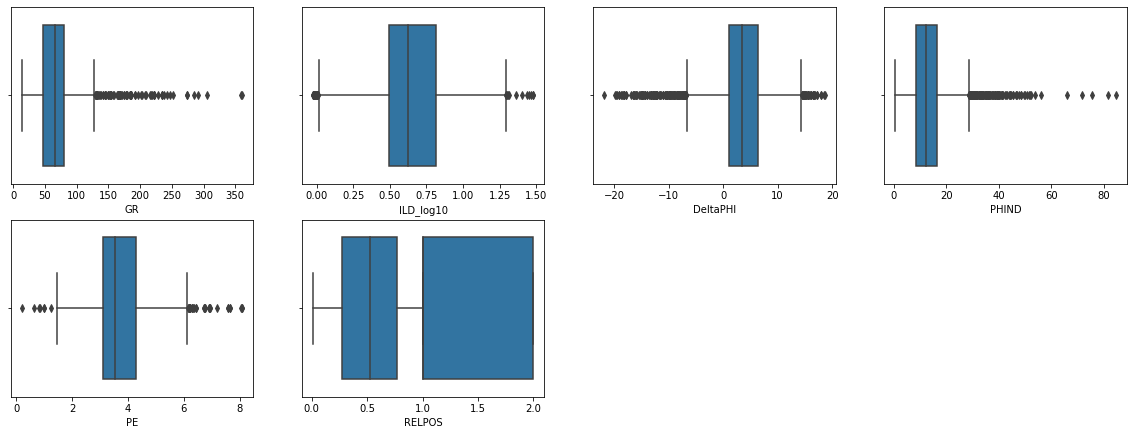

In [62]:
figure=plt.subplots(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(x=df['GR'],data=df)

plt.subplot(4,4,2)
sns.boxplot(x=df['ILD_log10'],data=df)

plt.subplot(4,4,3)
sns.boxplot(x=df['DeltaPHI'],data=df)

plt.subplot(4,4,4)
sns.boxplot(x=df['PHIND'],data=df)

plt.subplot(4,4,5)
sns.boxplot(x=df['PE'],data=df)

plt.subplot(4,4,6)
sns.boxplot(x=df['NM_M'],data=df)

plt.subplot(4,4,6)
sns.boxplot(x=df['RELPOS'],data=df)

plt.show()

#### Removing the outliers

In [63]:
df['GR']=df['GR'].clip(lower=df['GR'].quantile(0.05),upper=df['GR'].quantile(0.95))
df['ILD_log10']=df['ILD_log10'].clip(lower=df['ILD_log10'].quantile(0.05),upper=df['ILD_log10'].quantile(0.95))
df['DeltaPHI']=df['DeltaPHI'].clip(lower=df['DeltaPHI'].quantile(0.05),upper=df['DeltaPHI'].quantile(0.95))
df['PHIND']=df['PHIND'].clip(lower=df['PHIND'].quantile(0.05),upper=df['PHIND'].quantile(0.95))
df['PE']=df['PE'].clip(lower=df['PE'].quantile(0.05),upper=df['PE'].quantile(0.95))

#### Checking if the outliers have been removed

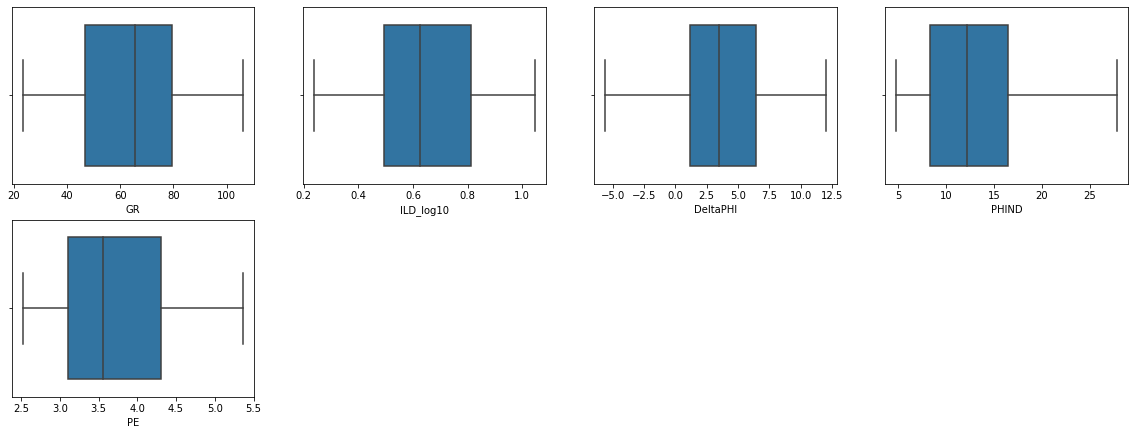

In [64]:
figure=plt.subplots(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(x=df['GR'],data=df)

plt.subplot(4,4,2)
sns.boxplot(x=df['ILD_log10'],data=df)

plt.subplot(4,4,3)
sns.boxplot(x=df['DeltaPHI'],data=df)

plt.subplot(4,4,4)
sns.boxplot(x=df['PHIND'],data=df)

plt.subplot(4,4,5)
sns.boxplot(x=df['PE'],data=df)

plt.show()

#### Adding the facies label to the dataset

In [66]:
df.insert(loc=1, column="Facies_label", value=0)
df

,Facies,Facies_label,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,0,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,0,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,12.000,12.565,4.100,1,0.979
2,3,0,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,12.000,13.050,3.600,1,0.957
3,3,0,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,12.000,13.115,3.500,1,0.936
4,3,0,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,12.000,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...,...
3227,5,0,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,0,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,0,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,0,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [67]:
for x in df.index:
    if df.loc[x,'Facies'] == 1:
        df.loc[x,'Facies_label']= 'SS'
    elif df.loc[x,'Facies'] == 2:
        df.loc[x,'Facies_label']='CSiS'
    elif df.loc[x,'Facies'] == 3:
        df.loc[x,'Facies_label']='FSiS' 
    elif df.loc[x,'Facies'] == 4:
        df.loc[x,'Facies_label']='SiSh'
    elif df.loc[x,'Facies'] == 5:
        df.loc[x,'Facies_label']='MS'
    elif df.loc[x,'Facies'] == 6:
        df.loc[x,'Facies_label']='WS'
    elif df.loc[x,'Facies'] == 7:
        df.loc[x,'Facies_label']='D'
    elif df.loc[x,'Facies'] == 8:
        df.loc[x,'Facies_label']='PS'
    elif df.loc[x,'Facies'] == 9:
        df.loc[x,'Facies_label']='BS'
    else:
        print('nan')

In [68]:
df

,Facies,Facies_label,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,FSiS,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,FSiS,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,12.000,12.565,4.100,1,0.979
2,3,FSiS,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,12.000,13.050,3.600,1,0.957
3,3,FSiS,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,12.000,13.115,3.500,1,0.936
4,3,FSiS,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,12.000,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...,...
3227,5,MS,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,MS,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,MS,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,MS,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


#### Shuffling the data

In [69]:
df=df.sample(frac=1)
df

,Facies,Facies_label,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
1193,2,CSiS,B4 SH,LUKE G U,2747.0,74.350,0.539,7.700,12.7500,3.1000,1,0.609
3162,3,FSiS,C SH,CHURCHMAN BIBLE,3088.0,86.438,0.512,-5.600,27.7874,2.5233,1,0.912
2244,8,PS,C LM,NOLAN,3034.5,23.491,0.908,-0.063,7.5340,4.5550,2,0.964
2855,6,WS,A1 LM,CHURCHMAN BIBLE,2931.0,39.875,0.939,-1.698,5.2140,3.7990,2,0.913
2284,4,SiSh,C LM,NOLAN,3054.5,106.268,0.890,3.504,8.0190,4.0230,2,0.607
...,...,...,...,...,...,...,...,...,...,...,...,...
1261,6,WS,B5 LM,LUKE G U,2781.0,78.510,0.642,1.500,5.0500,4.5000,2,0.010
560,6,WS,A1 LM,SHANKLE,2819.5,75.600,0.907,6.700,8.9850,4.0000,2,0.349
2023,8,PS,B1 LM,NOLAN,2924.0,23.491,0.845,1.437,6.1800,4.0940,2,0.850
1954,6,WS,A1 LM,NOLAN,2889.5,100.063,0.733,1.139,9.9930,5.2580,2,0.517


#### Removing the blind dataset for testing

In [70]:
blind = df[df['Well Name'] == 'SHANKLE']
df = df[df['Well Name'] != 'SHANKLE']

In [71]:
blind

,Facies,Facies_label,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
640,2,CSiS,B2 SH,SHANKLE,2861.5,67.14,0.727000,3.8,8.4900,3.30000,1,0.765
804,3,FSiS,C SH,SHANKLE,2949.5,69.67,0.584000,-1.6,24.6800,2.60000,1,0.877
680,2,CSiS,B3 SH,SHANKLE,2881.5,64.65,0.646000,4.8,11.0200,3.30000,1,0.773
545,6,WS,A1 LM,SHANKLE,2812.0,65.29,1.009000,1.4,5.1750,5.36955,2,0.721
768,3,FSiS,B5 SH,SHANKLE,2930.0,79.36,0.470000,-5.6,27.7874,2.52330,1,0.450
...,...,...,...,...,...,...,...,...,...,...,...,...
724,1,SS,B4 SH,SHANKLE,2905.0,59.88,0.371000,1.2,14.2000,2.90000,1,0.750
555,6,WS,A1 LM,SHANKLE,2817.0,37.24,1.045606,1.1,6.5900,4.70000,2,0.488
494,1,SS,A1 SH,SHANKLE,2786.0,52.86,0.378000,2.5,14.4900,2.60000,1,0.629
823,3,FSiS,C SH,SHANKLE,2959.0,72.96,0.627000,-5.6,27.7874,2.52330,1,0.544


### 4. Data Visualization

#### 1. Counting the number of facies
where,
     1=Nonmarine Sandstone(SS),
     2=Nonmarine Coarse Siltstone(CSiS),
     3=Nonmarine Fine Siltstone(FSiS),
     4=Marine Siltstone and Shale(SiSh),
     5=Mudstone(MS),
     6=Wackestone(WS),
     7=Dolomite(DS),
     8=Packstone-grainstone(PS),
     9=Phylloid-algal bafflestone(BS),

<AxesSubplot:xlabel='Facies', ylabel='count'>

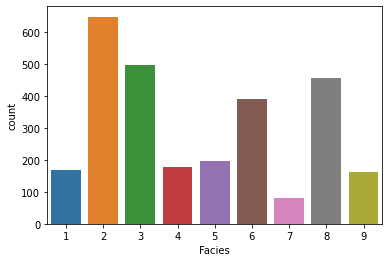

In [72]:
sns.countplot(x=df['Facies'],data=df)

#### Creating a dictionary of the facies color and the facies label

In [73]:
def facies_color_map(keys, values):
    return dict(zip(keys, values))

facies_colors = ['#FFD700','#DAA520','#90EE90','#00FF00','#FFFF14','#FE420F',
                '#00FFFF','#7FFFD4','#F5F5DC']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

print(facies_color_map(facies_labels,facies_colors ))

{'SS': '#FFD700', 'CSiS': '#DAA520', 'FSiS': '#90EE90', 'SiSh': '#00FF00', 'MS': '#FFFF14', 'WS': '#FE420F', 'D': '#00FFFF', 'PS': '#7FFFD4', 'BS': '#F5F5DC'}


#### Plotting the input parameters and output parameters

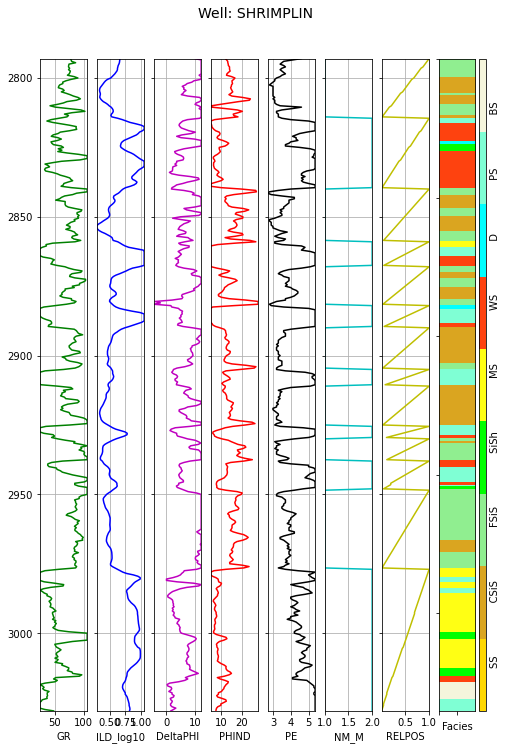

In [134]:
def facies_plot(logs, facies_colors):
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(8, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-',color='b')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='m')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='k')
    ax[5].plot(logs.NM_M, logs.Depth, '-', color='c')
    ax[6].plot(logs.RELPOS, logs.Depth, '-', color='y')
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join(['SS','CSiS','FSiS','SiSh','MS','WS','D','PS','BS']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
        
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel("NM_M")
    ax[5].set_xlim(logs.NM_M.min(),logs.NM_M.max())
    ax[6].set_xlabel("RELPOS")
    ax[6].set_xlim(logs.RELPOS.min(),logs.RELPOS.max())
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]);
    ax[7].set_yticklabels([]); ax[7].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

facies_plot(df[df['Well Name'] == 'SHRIMPLIN'],facies_colors)

#### Data pre-processing contd.

####  Separating the input and output parameters from the dataset

In [75]:
X=df.drop(['Formation', 'Well Name', 'Depth','Facies','Facies_label'], axis=1)
Y=df['Facies']

#### Scaling the input parameter(X)

In [76]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(X)

#### Splitting the dataset into training and testing dataset

In [77]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x_scaled,Y,test_size=0.1)

In [78]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((2504, 7), (2504,), (279, 7), (279,))

### 5. Building the model using the Machine Learning Algorithms

### 1. Decision Tree

In [79]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=100,ccp_alpha=0.0,
                           max_features=None,splitter='best', 
                          min_samples_leaf=2,min_samples_split=4,random_state=42
                           )
dt.fit(xtrain,ytrain).get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [80]:
predictions=dt.predict(xtest)
predt=dt.predict(xtrain)

In [81]:
print(f'The Accuracy for the testing set is : ',dt.score(xtest,ytest))
print(f'The Accuracy for the training set is : ',dt.score(xtrain,ytrain))

The Accuracy for the testing set is :  0.6523297491039427
The Accuracy for the training set is :  0.9233226837060703


#### Evaluating the model using different Classification metrics

In [82]:
accuracy=accuracy_score(ytest,predictions.round())
precision=precision_score(ytest,predictions.round(),average='weighted')
recall=recall_score(ytest,predictions.round(),average='weighted')
f1score=f1_score(ytest,predictions.round(),average='weighted')

print('Accuracy:%.2f%%' %(accuracy*100.0))
print('Precision:%.2f%%' %(precision*100.0))
print('Recall:%.2f%%' %(recall*100.0))
print('F1-score:%.2f%%' %(f1score*100.0))

Accuracy:65.23%
Precision:65.55%
Recall:65.23%
F1-score:65.03%


In [83]:
cm_dt=confusion_matrix(ytest,predictions)
cm_dt

array([[10,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 4, 40, 15,  0,  0,  0,  0,  0,  0],
       [ 2, 10, 31,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  0, 20,  2,  1,  0,  0,  0],
       [ 0,  0,  1,  1, 11,  7,  0,  3,  0],
       [ 0,  0,  0,  5,  3, 23,  0,  8,  0],
       [ 0,  0,  0,  1,  1,  1,  3,  2,  1],
       [ 0,  1,  1,  3,  5,  7,  2, 27,  1],
       [ 0,  0,  0,  1,  0,  1,  1,  1, 17]], dtype=int64)

In [84]:
blind

,Facies,Facies_label,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
640,2,CSiS,B2 SH,SHANKLE,2861.5,67.14,0.727000,3.8,8.4900,3.30000,1,0.765
804,3,FSiS,C SH,SHANKLE,2949.5,69.67,0.584000,-1.6,24.6800,2.60000,1,0.877
680,2,CSiS,B3 SH,SHANKLE,2881.5,64.65,0.646000,4.8,11.0200,3.30000,1,0.773
545,6,WS,A1 LM,SHANKLE,2812.0,65.29,1.009000,1.4,5.1750,5.36955,2,0.721
768,3,FSiS,B5 SH,SHANKLE,2930.0,79.36,0.470000,-5.6,27.7874,2.52330,1,0.450
...,...,...,...,...,...,...,...,...,...,...,...,...
724,1,SS,B4 SH,SHANKLE,2905.0,59.88,0.371000,1.2,14.2000,2.90000,1,0.750
555,6,WS,A1 LM,SHANKLE,2817.0,37.24,1.045606,1.1,6.5900,4.70000,2,0.488
494,1,SS,A1 SH,SHANKLE,2786.0,52.86,0.378000,2.5,14.4900,2.60000,1,0.629
823,3,FSiS,C SH,SHANKLE,2959.0,72.96,0.627000,-5.6,27.7874,2.52330,1,0.544


#### Scaling the input parameters

In [85]:
scaler = StandardScaler()
y_blind = blind['Facies'].values
x_blind = blind.drop(['Facies', 'Formation', 'Well Name', 'Depth','Facies_label'], axis=1)
x_blind = scaler.fit_transform(x_blind)

In [86]:
ypred = dt.predict(x_blind)
blind.insert(loc=1, column="Prediction_dt", value=ypred)
blind

,Facies,Prediction_dt,Facies_label,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
640,2,1,CSiS,B2 SH,SHANKLE,2861.5,67.14,0.727000,3.8,8.4900,3.30000,1,0.765
804,3,3,FSiS,C SH,SHANKLE,2949.5,69.67,0.584000,-1.6,24.6800,2.60000,1,0.877
680,2,3,CSiS,B3 SH,SHANKLE,2881.5,64.65,0.646000,4.8,11.0200,3.30000,1,0.773
545,6,6,WS,A1 LM,SHANKLE,2812.0,65.29,1.009000,1.4,5.1750,5.36955,2,0.721
768,3,3,FSiS,B5 SH,SHANKLE,2930.0,79.36,0.470000,-5.6,27.7874,2.52330,1,0.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,1,2,SS,B4 SH,SHANKLE,2905.0,59.88,0.371000,1.2,14.2000,2.90000,1,0.750
555,6,8,WS,A1 LM,SHANKLE,2817.0,37.24,1.045606,1.1,6.5900,4.70000,2,0.488
494,1,1,SS,A1 SH,SHANKLE,2786.0,52.86,0.378000,2.5,14.4900,2.60000,1,0.629
823,3,2,FSiS,C SH,SHANKLE,2959.0,72.96,0.627000,-5.6,27.7874,2.52330,1,0.544


In [87]:
acc_dt=accuracy_score(y_blind,ypred.round())
acc_dt

0.45657015590200445

### 2.Logistic Regression

In [88]:
from sklearn import linear_model
mymodel=linear_model.LogisticRegression(C=0.2,max_iter=1000,solver='lbfgs',penalty='l2',multi_class='auto',
                                        fit_intercept=True, intercept_scaling=1,n_jobs=None)
mymodel.fit(xtrain,ytrain).get_params()

{'C': 0.2,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [89]:
prediction=mymodel.predict(xtest)
predt=mymodel.predict(xtrain)

In [90]:
print(f'The Accuracy for the testing set is : ',mymodel.score(xtest,ytest))
print(f'The Accuracy for the training set is : ',mymodel.score(xtrain,ytrain))

The Accuracy for the testing set is :  0.5913978494623656
The Accuracy for the training set is :  0.588258785942492


In [91]:
accuracy=accuracy_score(ytest,prediction.round())
precision=precision_score(ytest,prediction.round(),average='weighted')
recall=recall_score(ytest,prediction.round(),average='weighted')
f1score=f1_score(ytest,prediction.round(),average='weighted')

print('Accuracy:%.2f%%' %(accuracy*100.0))
print('Precision:%.2f%%' %(precision*100.0))
print('Recall:%.2f%%' %(recall*100.0))
print('F1-score:%.2f%%' %(f1score*100.0))

Accuracy:59.14%
Precision:58.50%
Recall:59.14%
F1-score:57.89%


In [92]:
cm_mymodel=confusion_matrix(ytest,prediction)
cm_mymodel

array([[ 9,  4,  0,  0,  0,  0,  0,  0,  0],
       [ 2, 45, 12,  0,  0,  0,  0,  0,  0],
       [ 0, 14, 29,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  0, 15,  2,  6,  0,  0,  0],
       [ 0,  1,  0,  1,  1, 13,  1,  5,  1],
       [ 0,  0,  0,  2,  1, 24,  1, 11,  0],
       [ 0,  0,  0,  2,  1,  0,  2,  4,  0],
       [ 0,  2,  0,  1,  2, 13,  0, 27,  2],
       [ 0,  0,  0,  0,  0,  3,  0,  5, 13]], dtype=int64)

In [93]:
blind

,Facies,Prediction_dt,Facies_label,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
640,2,1,CSiS,B2 SH,SHANKLE,2861.5,67.14,0.727000,3.8,8.4900,3.30000,1,0.765
804,3,3,FSiS,C SH,SHANKLE,2949.5,69.67,0.584000,-1.6,24.6800,2.60000,1,0.877
680,2,3,CSiS,B3 SH,SHANKLE,2881.5,64.65,0.646000,4.8,11.0200,3.30000,1,0.773
545,6,6,WS,A1 LM,SHANKLE,2812.0,65.29,1.009000,1.4,5.1750,5.36955,2,0.721
768,3,3,FSiS,B5 SH,SHANKLE,2930.0,79.36,0.470000,-5.6,27.7874,2.52330,1,0.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,1,2,SS,B4 SH,SHANKLE,2905.0,59.88,0.371000,1.2,14.2000,2.90000,1,0.750
555,6,8,WS,A1 LM,SHANKLE,2817.0,37.24,1.045606,1.1,6.5900,4.70000,2,0.488
494,1,1,SS,A1 SH,SHANKLE,2786.0,52.86,0.378000,2.5,14.4900,2.60000,1,0.629
823,3,2,FSiS,C SH,SHANKLE,2959.0,72.96,0.627000,-5.6,27.7874,2.52330,1,0.544


In [94]:
ypredt = mymodel.predict(x_blind)
blind.insert(loc=1, column="Prediction_lr", value=ypredt)
blind

,Facies,Prediction_lr,Prediction_dt,Facies_label,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
640,2,2,1,CSiS,B2 SH,SHANKLE,2861.5,67.14,0.727000,3.8,8.4900,3.30000,1,0.765
804,3,3,3,FSiS,C SH,SHANKLE,2949.5,69.67,0.584000,-1.6,24.6800,2.60000,1,0.877
680,2,2,3,CSiS,B3 SH,SHANKLE,2881.5,64.65,0.646000,4.8,11.0200,3.30000,1,0.773
545,6,8,6,WS,A1 LM,SHANKLE,2812.0,65.29,1.009000,1.4,5.1750,5.36955,2,0.721
768,3,3,3,FSiS,B5 SH,SHANKLE,2930.0,79.36,0.470000,-5.6,27.7874,2.52330,1,0.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,1,1,2,SS,B4 SH,SHANKLE,2905.0,59.88,0.371000,1.2,14.2000,2.90000,1,0.750
555,6,6,8,WS,A1 LM,SHANKLE,2817.0,37.24,1.045606,1.1,6.5900,4.70000,2,0.488
494,1,1,1,SS,A1 SH,SHANKLE,2786.0,52.86,0.378000,2.5,14.4900,2.60000,1,0.629
823,3,3,2,FSiS,C SH,SHANKLE,2959.0,72.96,0.627000,-5.6,27.7874,2.52330,1,0.544


In [95]:
acc_lr=accuracy_score(y_blind,ypredt.round())
acc_lr

0.5389755011135857

### 3.Multi layer perceptron Artificial Neural Network

In [96]:
ytrain,ytest=pd.DataFrame(ytrain),pd.DataFrame(ytest)
print(ytrain.shape)
print(ytest.shape)
print(xtrain.shape)
print(xtest.shape)

(2504, 1)
(279, 1)
(2504, 7)
(279, 7)


#### Coverting the target column/output parameters into categorical values using onehot encoding

In [97]:
onehot_data = OneHotEncoder(sparse=False)
y_train = onehot_data.fit_transform(ytrain)
y_test=onehot_data.fit_transform(ytest)

#### Creating the neural network model

In [98]:
model=keras.Sequential(
[keras.layers.Dense(units=512,input_dim=xtrain.shape[1],activation='relu',name='input_layer'),  
  
keras.layers.Dense(units=256,activation='relu',name='layer2'),    
 keras.layers.Dropout(rate=0.1),
 
keras.layers.Dense(units=64,activation='relu',name='layer3'),
  
keras.layers.Dense(y_train.shape[1],activation='softmax',name='output_layer')])      


In [99]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])  

In [100]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 512)               4096      
_________________________________________________________________
layer2 (Dense)               (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
layer3 (Dense)               (None, 64)                16448     
_________________________________________________________________
output_layer (Dense)         (None, 9)                 585       
Total params: 152,457
Trainable params: 152,457
Non-trainable params: 0
_________________________________________________________________


In [101]:
history=model.fit(xtrain, y_train,validation_split=0.1,epochs=200,verbose=2,batch_size=128)
history        

Epoch 1/200
18/18 - 1s - loss: 1.6388 - accuracy: 0.4518 - val_loss: 1.2558 - val_accuracy: 0.5100
Epoch 2/200
18/18 - 0s - loss: 1.1517 - accuracy: 0.5513 - val_loss: 1.1386 - val_accuracy: 0.5339
Epoch 3/200
18/18 - 0s - loss: 1.0546 - accuracy: 0.5739 - val_loss: 1.0771 - val_accuracy: 0.5737
Epoch 4/200
18/18 - 0s - loss: 1.0120 - accuracy: 0.5766 - val_loss: 1.0303 - val_accuracy: 0.5976
Epoch 5/200
18/18 - 0s - loss: 0.9710 - accuracy: 0.6010 - val_loss: 0.9922 - val_accuracy: 0.6096
Epoch 6/200
18/18 - 0s - loss: 0.9467 - accuracy: 0.6005 - val_loss: 0.9863 - val_accuracy: 0.6135
Epoch 7/200
18/18 - 0s - loss: 0.9299 - accuracy: 0.6223 - val_loss: 0.9749 - val_accuracy: 0.6135
Epoch 8/200
18/18 - 0s - loss: 0.9227 - accuracy: 0.6236 - val_loss: 0.9807 - val_accuracy: 0.6335
Epoch 9/200
18/18 - 0s - loss: 0.8976 - accuracy: 0.6329 - val_loss: 0.9613 - val_accuracy: 0.6096
Epoch 10/200
18/18 - 0s - loss: 0.8776 - accuracy: 0.6418 - val_loss: 0.9415 - val_accuracy: 0.6494
Epoch 11/

18/18 - 0s - loss: 0.3894 - accuracy: 0.8464 - val_loss: 0.8187 - val_accuracy: 0.7371
Epoch 84/200
18/18 - 0s - loss: 0.3748 - accuracy: 0.8584 - val_loss: 0.8103 - val_accuracy: 0.7490
Epoch 85/200
18/18 - 0s - loss: 0.3827 - accuracy: 0.8531 - val_loss: 0.7961 - val_accuracy: 0.7371
Epoch 86/200
18/18 - 0s - loss: 0.3779 - accuracy: 0.8513 - val_loss: 0.8654 - val_accuracy: 0.7171
Epoch 87/200
18/18 - 0s - loss: 0.3715 - accuracy: 0.8566 - val_loss: 0.8158 - val_accuracy: 0.7251
Epoch 88/200
18/18 - 0s - loss: 0.3519 - accuracy: 0.8700 - val_loss: 0.8412 - val_accuracy: 0.7291
Epoch 89/200
18/18 - 0s - loss: 0.3520 - accuracy: 0.8673 - val_loss: 0.8275 - val_accuracy: 0.7371
Epoch 90/200
18/18 - 0s - loss: 0.3599 - accuracy: 0.8589 - val_loss: 0.8230 - val_accuracy: 0.7410
Epoch 91/200
18/18 - 0s - loss: 0.3563 - accuracy: 0.8602 - val_loss: 0.8577 - val_accuracy: 0.7371
Epoch 92/200
18/18 - 0s - loss: 0.3277 - accuracy: 0.8704 - val_loss: 0.8561 - val_accuracy: 0.7371
Epoch 93/200


Epoch 165/200
18/18 - 0s - loss: 0.2128 - accuracy: 0.9192 - val_loss: 0.9940 - val_accuracy: 0.7410
Epoch 166/200
18/18 - 0s - loss: 0.2013 - accuracy: 0.9201 - val_loss: 0.9968 - val_accuracy: 0.7570
Epoch 167/200
18/18 - 0s - loss: 0.1986 - accuracy: 0.9285 - val_loss: 0.9471 - val_accuracy: 0.7530
Epoch 168/200
18/18 - 0s - loss: 0.1991 - accuracy: 0.9263 - val_loss: 0.9520 - val_accuracy: 0.7610
Epoch 169/200
18/18 - 0s - loss: 0.1911 - accuracy: 0.9263 - val_loss: 1.0210 - val_accuracy: 0.7649
Epoch 170/200
18/18 - 0s - loss: 0.1898 - accuracy: 0.9277 - val_loss: 0.9785 - val_accuracy: 0.7530
Epoch 171/200
18/18 - 0s - loss: 0.1795 - accuracy: 0.9361 - val_loss: 1.0362 - val_accuracy: 0.7530
Epoch 172/200
18/18 - 0s - loss: 0.1883 - accuracy: 0.9330 - val_loss: 1.0013 - val_accuracy: 0.7570
Epoch 173/200
18/18 - 0s - loss: 0.1799 - accuracy: 0.9334 - val_loss: 1.0008 - val_accuracy: 0.7570
Epoch 174/200
18/18 - 0s - loss: 0.1723 - accuracy: 0.9401 - val_loss: 1.0195 - val_accurac

#### Evaluating the model

In [102]:
loss,accuracy=model.evaluate(xtrain,y_train)
print('loss for training data= ',loss)
print('accuracy for training data= ',accuracy)
loss2,accuracy2=model.evaluate(xtest,y_test)
print('loss for testing data= ',loss2)
print('accuracy for testing data= ',accuracy2)

79/79 [==============================] - 0s 4ms/step - loss: 0.2107 - accuracy: 0.9465: 0s - loss: 0.1064 - accuracy: 0.
loss for training data=  0.21067480742931366
accuracy for training data=  0.9464856386184692
9/9 [==============================] - 0s 4ms/step - loss: 1.1613 - accuracy: 0.7563
loss for testing data=  1.1612768173217773
accuracy for testing data=  0.7562723755836487


In [103]:
prediction=model.predict(xtest)
(np.argmax(prediction[20:40],axis=1)+1)

array([3, 9, 5, 8, 3, 8, 6, 8, 2, 6, 4, 4, 2, 3, 8, 6, 2, 6, 3, 6],
      dtype=int64)

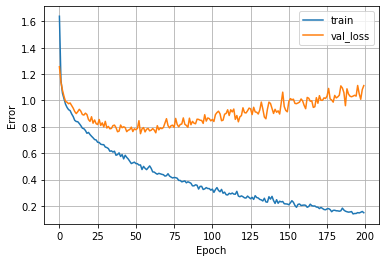

In [105]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

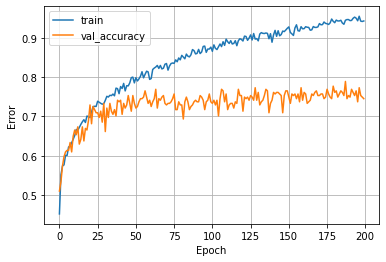

In [106]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [107]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy=accuracy_score(y_test,prediction.round())
precision=precision_score(y_test,prediction.round(),average='weighted')
recall=recall_score(y_test,prediction.round(),average='weighted')
f1score=f1_score(y_test,prediction.round(),average='weighted')

print('Accuracy:%.2f%%' %(accuracy*100.0))
print('Precision:%.2f%%' %(precision*100.0))
print('Recall:%.2f%%' %(recall*100.0))
print('F1-score:%.2f%%' %(f1score*100.0))

Accuracy:74.91%
Precision:77.49%
Recall:74.91%
F1-score:75.91%


### Testing the model using the blind dataset

In [108]:
blind

,Facies,Prediction_lr,Prediction_dt,Facies_label,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
640,2,2,1,CSiS,B2 SH,SHANKLE,2861.5,67.14,0.727000,3.8,8.4900,3.30000,1,0.765
804,3,3,3,FSiS,C SH,SHANKLE,2949.5,69.67,0.584000,-1.6,24.6800,2.60000,1,0.877
680,2,2,3,CSiS,B3 SH,SHANKLE,2881.5,64.65,0.646000,4.8,11.0200,3.30000,1,0.773
545,6,8,6,WS,A1 LM,SHANKLE,2812.0,65.29,1.009000,1.4,5.1750,5.36955,2,0.721
768,3,3,3,FSiS,B5 SH,SHANKLE,2930.0,79.36,0.470000,-5.6,27.7874,2.52330,1,0.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,1,1,2,SS,B4 SH,SHANKLE,2905.0,59.88,0.371000,1.2,14.2000,2.90000,1,0.750
555,6,6,8,WS,A1 LM,SHANKLE,2817.0,37.24,1.045606,1.1,6.5900,4.70000,2,0.488
494,1,1,1,SS,A1 SH,SHANKLE,2786.0,52.86,0.378000,2.5,14.4900,2.60000,1,0.629
823,3,3,2,FSiS,C SH,SHANKLE,2959.0,72.96,0.627000,-5.6,27.7874,2.52330,1,0.544


In [109]:
blind.describe()

,Facies,Prediction_lr,Prediction_dt,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,3.576837,3.614699,3.621381,2890.502227,63.740833,0.628017,2.848775,14.870952,3.262051,1.340757,0.503118
std,2.260688,2.183718,2.280368,68.320926,18.576917,0.228576,4.729104,6.827057,0.681787,0.474493,0.282082
min,1.000000,1.000000,1.000000,2774.500000,23.491000,0.237299,-5.600000,4.800000,2.523300,1.000000,0.010000
25%,2.000000,2.000000,2.000000,2831.000000,54.960000,0.425000,0.100000,9.150000,2.700000,1.000000,0.258000
50%,3.000000,3.000000,3.000000,2889.000000,66.600000,0.620000,2.600000,13.935000,3.100000,1.000000,0.500000
75%,6.000000,6.000000,6.000000,2951.000000,75.150000,0.817000,6.200000,18.575000,3.600000,2.000000,0.744000
max,8.000000,9.000000,9.000000,3008.000000,106.268000,1.045606,12.000000,27.787400,5.369550,2.000000,1.000000


#### Data Visualization

<AxesSubplot:xlabel='Facies', ylabel='count'>

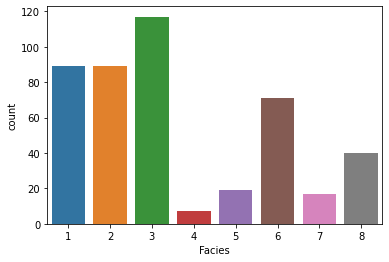

In [110]:
sns.countplot(x=blind['Facies'],data=blind)

In [111]:
y_pred = model.predict(x_blind)
yprediction=(np.argmax(y_pred,axis=1)+1)
blind.insert(loc=1, column="Prediction_ANN", value=yprediction)
blind

,Facies,Prediction_ANN,Prediction_lr,Prediction_dt,Facies_label,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
640,2,2,2,1,CSiS,B2 SH,SHANKLE,2861.5,67.14,0.727000,3.8,8.4900,3.30000,1,0.765
804,3,3,3,3,FSiS,C SH,SHANKLE,2949.5,69.67,0.584000,-1.6,24.6800,2.60000,1,0.877
680,2,3,2,3,CSiS,B3 SH,SHANKLE,2881.5,64.65,0.646000,4.8,11.0200,3.30000,1,0.773
545,6,6,8,6,WS,A1 LM,SHANKLE,2812.0,65.29,1.009000,1.4,5.1750,5.36955,2,0.721
768,3,3,3,3,FSiS,B5 SH,SHANKLE,2930.0,79.36,0.470000,-5.6,27.7874,2.52330,1,0.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,1,1,1,2,SS,B4 SH,SHANKLE,2905.0,59.88,0.371000,1.2,14.2000,2.90000,1,0.750
555,6,6,6,8,WS,A1 LM,SHANKLE,2817.0,37.24,1.045606,1.1,6.5900,4.70000,2,0.488
494,1,1,1,1,SS,A1 SH,SHANKLE,2786.0,52.86,0.378000,2.5,14.4900,2.60000,1,0.629
823,3,3,3,2,FSiS,C SH,SHANKLE,2959.0,72.96,0.627000,-5.6,27.7874,2.52330,1,0.544


In [112]:
accuracy_ANN=accuracy_score(y_blind,yprediction.round())
accuracy_ANN

0.5545657015590201

In [113]:
cm_ANN=confusion_matrix(y_blind,yprediction)
cm_ANN

array([[50, 37,  2,  0,  0,  0,  0,  0,  0],
       [25, 40, 23,  0,  1,  0,  0,  0,  0],
       [ 1, 34, 75,  2,  4,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  7,  0,  8,  0],
       [ 0,  0,  0,  2,  4, 49,  0, 15,  1],
       [ 0,  0,  0,  0,  0,  0, 13,  4,  0],
       [ 0,  0,  0,  0,  1, 16,  0, 21,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

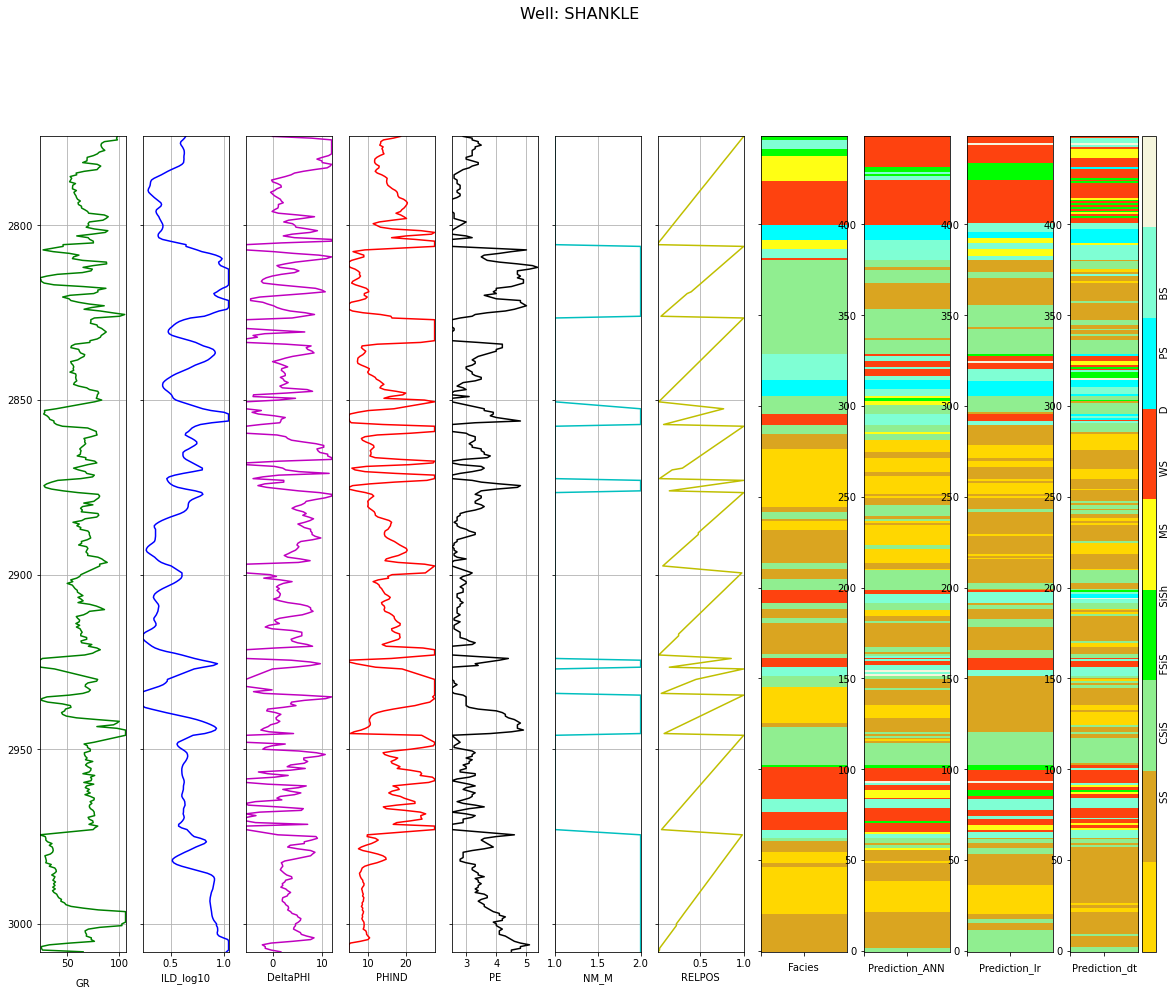

In [132]:
def compare_facies_plot(logs, compare,compari,compara, facies_colors):
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    cluster1=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2=np.repeat(np.expand_dims(logs[compare].values,1), 100, 1)
    cluster3=np.repeat(np.expand_dims(logs[compari].values,1), 100, 1)
    cluster4=np.repeat(np.expand_dims(logs[compara].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=11, figsize=(20, 15))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-',color='b')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='m')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='k')
    ax[5].plot(logs.NM_M, logs.Depth, '-', color='c')
    ax[6].plot(logs.RELPOS, logs.Depth, '-', color='y')
    im=ax[7].imshow(cluster1, interpolation='nearest', aspect='auto',cmap=cmap_facies,vmin=1,vmax=9,origin ='lower')
    im=ax[8].imshow(cluster2, interpolation='nearest', aspect='auto',cmap=cmap_facies,vmin=1,vmax=9,origin ='lower')
    im=ax[9].imshow(cluster3, interpolation='nearest', aspect='auto',cmap=cmap_facies,vmin=1,vmax=9,origin ='lower')
    im=ax[10].imshow(cluster4, interpolation='nearest', aspect='auto',cmap=cmap_facies,vmin=1,vmax=9,origin ='lower')
    
    
    divider = make_axes_locatable(ax[10])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((15*' ').join(['SS','CSiS','FSiS','SiSh','MS','WS','D','PS','BS']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-4):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
        
    ax[0].set_xlabel("GR",loc='center')
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10",loc='center')
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI",loc='center')
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND",loc='center')
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE",loc='center')
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel("NM_M",loc='center')
    ax[5].set_xlim(logs.NM_M.min(),logs.NM_M.max())
    ax[6].set_xlabel("RELPOS",loc='center')
    ax[6].set_xlim(logs.RELPOS.min(),logs.RELPOS.max())
    ax[7].set_xlabel('Facies',loc='center')
    ax[8].set_xlabel(compare)
    ax[9].set_xlabel(compari)
    ax[10].set_xlabel(compara)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]);
    ax[7].set_yticklabels([]); ax[7].set_xticklabels([]); ax[8].set_xticklabels([])
    ax[9].set_xticklabels([]);ax[10].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=16,y=1.00)

compare_facies_plot(blind, 'Prediction_ANN' ,'Prediction_lr','Prediction_dt', facies_colors)

# 